In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
np.set_printoptions(suppress=True)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection



from ipywidgets import interactive, FloatSlider
from ipywidgets import interact, HBox, VBox, interactive_output, widgets
from IPython.display import display

In [3]:
path = "instacart_data_subset"
df_orders = pd.read_csv(path+"/orders_subset.csv")
df_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


In [4]:
df_order_products_prior = pd.read_csv(path + "/order_products__prior_subset.csv")
df_order_products_prior.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,12,30597,1,1
1,12,15221,2,1
2,12,43772,3,1


In [5]:
df_order_products_train = pd.read_csv(path+"/order_products__train_subset.csv")
df_order_products_train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1077,13176,1,1
1,1077,39922,2,1
2,1077,5258,3,1


In [6]:
df_order_products_train = df_order_products_train.merge(df_orders.drop("eval_set", axis=1), on="order_id")

In [7]:
df_order_products_train

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1077,13176,1,1,173934,11,6,9,10.0
1,1077,39922,2,1,173934,11,6,9,10.0
2,1077,5258,3,1,173934,11,6,9,10.0
3,1077,21137,4,1,173934,11,6,9,10.0
4,1119,6046,1,1,129386,7,1,14,17.0
...,...,...,...,...,...,...,...,...,...
53699,3420996,2086,7,1,15818,16,1,9,7.0
53700,3420996,29118,8,0,15818,16,1,9,7.0
53701,3420996,27423,9,1,15818,16,1,9,7.0
53702,3420996,12125,10,1,15818,16,1,9,7.0


In [8]:
df_order_products_prior = df_order_products_prior.merge(df_orders.drop("eval_set" ,axis=1),on="order_id")

In [9]:
df_order_products_prior

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,22,6,8,10.0
1,12,15221,2,1,152610,22,6,8,10.0
2,12,43772,3,1,152610,22,6,8,10.0
3,12,37886,4,1,152610,22,6,8,10.0
4,12,37215,5,0,152610,22,6,8,10.0
...,...,...,...,...,...,...,...,...,...
793919,3421029,29418,7,0,186579,26,6,17,21.0
793920,3421029,40449,8,1,186579,26,6,17,21.0
793921,3421029,37687,9,1,186579,26,6,17,21.0
793922,3421029,13852,10,0,186579,26,6,17,21.0


In [10]:
df_order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793924 entries, 0 to 793923
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                793924 non-null  int64  
 1   product_id              793924 non-null  int64  
 2   add_to_cart_order       793924 non-null  int64  
 3   reordered               793924 non-null  int64  
 4   user_id                 793924 non-null  int64  
 5   order_number            793924 non-null  int64  
 6   order_dow               793924 non-null  int64  
 7   order_hour_of_day       793924 non-null  int64  
 8   days_since_prior_order  742704 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 60.6 MB


In [11]:
df_user_product = (df_order_products_prior.groupby(["product_id","user_id"],as_index=False)
                                          .agg({"order_id":"count"})
                                          .rename(columns={"order_id":"user_product_total_orders"}))
train_ids = df_order_products_train["user_id"].unique()
df_X =df_user_product[df_user_product["user_id"].isin(train_ids)]
df_X.head()

,product_id,user_id,user_product_total_orders
0,1,21285,1
1,1,47549,4
2,1,54136,1
3,1,54240,1
4,1,95730,1


In [12]:
train_carts = (df_order_products_train.groupby("user_id", as_index=False)
                                      .agg({"product_id":(lambda x: set(x))})
                                      .rename(columns={"product_id":"latest_cart"}))

df_X = df_X.merge(train_carts, on="user_id")
df_X["in_cart"] = (df_X.apply(lambda row: row["product_id"] in row["latest_cart"], axis=1).astype(int))

df_X.head(10)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart
0,1,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0
1,3298,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0
2,4920,21285,3,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0
3,6066,21285,2,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0
4,6184,21285,6,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0
5,7987,21285,2,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0
6,10509,21285,5,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0
7,11759,21285,30,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",1
8,12341,21285,35,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",1
9,13042,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0


In [13]:
target_pcts = df_X.in_cart.value_counts(normalize=True)
target_pcts

0    0.901945
1    0.098055
Name: in_cart, dtype: float64

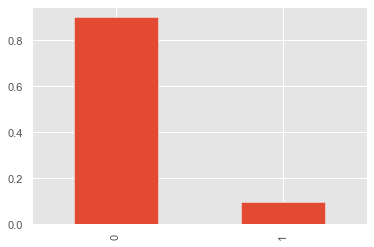

In [14]:
target_pcts.plot(kind="bar")

In [15]:
def get_user_split_data(df, test_size=.2, seed=42):
    
    rs = np.random.RandomState(seed)
    
    total_users = df["user_id"].unique()
    test_users = rs.choice(total_users, size=int(total_users.shape[0]*test_size), replace=False)
    
    df_tr = df[~df["user_id"].isin(test_users)]
    df_te = df[df["user_id"].isin(test_users)]
    
    y_tr, y_te = df_tr["in_cart"], df_te["in_cart"]
    X_tr = df_tr.drop(["product_id", "user_id", "latest_cart", "in_cart"],axis=1)
    X_te = df_te.drop(["product_id", "user_id", "latest_cart", "in_cart"],axis=1)
    
    return X_tr, X_te, y_tr, y_te

In [16]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression(solver="lbfgs")
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.08205128205128205

In [17]:
lr.coef_

array([[0.14981264]])

In [18]:
prod_features = ["product_total_orders","product_avg_add_to_cart_order"]

df_prod_features = (df_order_products_prior.groupby(["product_id"],as_index=False)
                                           .agg(OrderedDict([("order_id","nunique"),("add_to_cart_order","mean")])))

df_prod_features.columns = ["product_id"] + prod_features
df_prod_features.head()

,product_id,product_total_orders,product_avg_add_to_cart_order
0,1,26,4.576923
1,2,1,3.000000
2,3,1,4.000000
3,4,10,8.100000
4,8,1,25.000000


In [19]:
df_X = df_X.merge(df_prod_features, on="product_id")

df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order
0,1,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,26,4.576923
1,1,47549,4,"{27845, 27790, 13042, 10326, 37687}",0,26,4.576923
2,1,54136,1,"{47977, 5450, 26604, 5296, 11123, 24852, 10070...",0,26,4.576923
3,1,54240,1,"{12427, 26348}",0,26,4.576923
4,1,95730,1,"{39657, 10441, 12427, 37710, 10258, 32921, 45051}",0,26,4.576923


In [20]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression()
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.0925925925925926

In [21]:
user_features = ["user_total_orders", "user_avg_cartsize", "user_total_products", "user_avg_since_prior_order"]

df_user_features = (df_order_products_prior.groupby(["user_id"], as_index=False)
                                           .agg(OrderedDict(
                                                 [("order_id",["nunique", (lambda x: x.shape[0] / x.nunique())]),
                                                  ("product_id","nunique"),
                                                  ("days_since_prior_order","mean")])))

df_user_features.columns = ["user_id"] + user_features
df_user_features.head()

,user_id,user_total_orders,user_avg_cartsize,user_total_products,user_avg_since_prior_order
0,50,67,6.761194,89,5.691275
1,52,27,6.259259,51,9.134969
2,65,14,9.428571,80,13.594828
3,80,12,10.666667,52,9.857143
4,220,16,7.125000,44,14.980000


In [22]:
df_X = df_X.merge(df_user_features, on="user_id")
df_X = df_X.dropna()
df_X.head(1)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_since_prior_order
0,1,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,26,4.576923,48,6.604167,46,8.044872


In [23]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression()
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.13081554460864805

In [24]:
user_prod_features = ["user_product_avg_add_to_cart_order"]

df_user_prod_features = (df_order_products_prior.groupby(["product_id","user_id"],as_index=False)\
                                                .agg(OrderedDict([("add_to_cart_order","mean")])))

df_user_prod_features.columns = ["product_id","user_id"] + user_prod_features
df_user_prod_features.head()

,product_id,user_id,user_product_avg_add_to_cart_order
0,1,21285,3.0
1,1,47549,4.0
2,1,54136,3.0
3,1,54240,2.0
4,1,95730,1.0


In [25]:
df_X = df_X.merge(df_user_prod_features, on=["user_id","product_id"])
df_X["user_product_order_freq"] = df_X["user_product_total_orders"] / df_X["user_total_orders"]
df_X.head(2)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_since_prior_order,user_product_avg_add_to_cart_order,user_product_order_freq
0,1,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,26,4.576923,48,6.604167,46,8.044872,3.0,0.020833
1,3298,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,323,5.786378,48,6.604167,46,8.044872,5.0,0.020833


In [26]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te,), y_te)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.14148518869200594

In [27]:
df_X.to_csv(path+"/instacart_df_X_features2.csv", index=False)

In [28]:
df_products = pd.read_csv(path+"/products.csv")

In [29]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [30]:
df_X.head(1)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_since_prior_order,user_product_avg_add_to_cart_order,user_product_order_freq
0,1,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,26,4.576923,48,6.604167,46,8.044872,3.0,0.020833


In [31]:
df_X = df_X.merge(df_products, on="product_id").drop(["product_name"], axis=1)

In [32]:
df_X.head(1)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_since_prior_order,user_product_avg_add_to_cart_order,user_product_order_freq,aisle_id,department_id
0,1,21285,1,"{21573, 35561, 37710, 11759, 12341, 13176, 32478}",0,26,4.576923,48,6.604167,46,8.044872,3.0,0.020833,61,19


In [33]:
X_train, X_test, y_train, y_test  = get_user_split_data(df_X)

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("The score for KNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

The score for KNN is
Training:  91.02%
Test set:  89.89%


In [35]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

The score for logistic regression is
Training:  90.29%
Test set:  90.65%


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
logit.predict_proba(X_test[:5])

array([[0.92303645, 0.07696355],
       [0.9507141 , 0.0492859 ],
       [0.69840151, 0.30159849],
       [0.85894309, 0.14105691],
       [0.9170724 , 0.0829276 ]])

In [37]:
print("knn confusion matrix: \n\n", confusion_matrix(y_test, knn.predict(X_test)))

knn confusion matrix: 

 [[60486   782]
 [ 6063   347]]


In [38]:
def make_confusion_matrix(model, threshold=0.5):
    
    y_predict = (model.predict_proba(X_test)[:,1] >= threshold)
    mistake_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(mistake_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt="d",
               xticklabels=["in_cart", "mistake"],
               yticklabels=["in_cart", "mistake"]);
    plt.xlabel("prediction")
    plt.ylabel("actual")

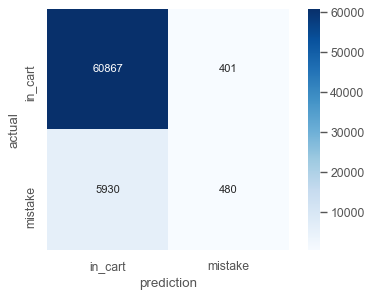

In [39]:
make_confusion_matrix(logit)

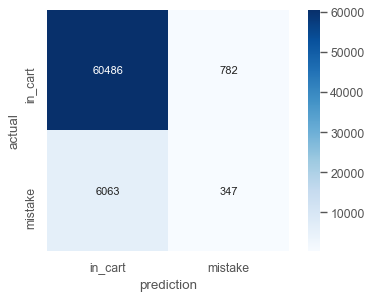

In [40]:
make_confusion_matrix(knn)

In [41]:


interactive(lambda threshold: make_confusion_matrix(logit, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [42]:
y_predict = logit.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict),
                                                    recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.5448,   Recall: 0.0749


In [43]:
y_predict = (logit.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict),
                                                    recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.1369,   Recall: 0.8591


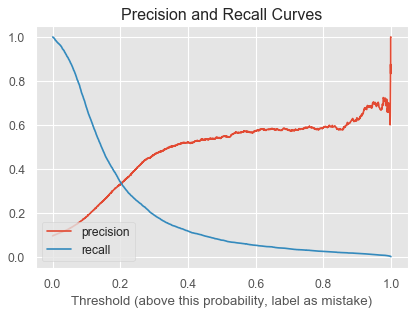

In [44]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, logit.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:], label="precision")
plt.plot(threshold_curve, recall_curve[1:], label="recall")
plt.legend(loc="lower left")
plt.xlabel("Threshold (above this probability, label as mistake)");
plt.title("Precision and Recall Curves");

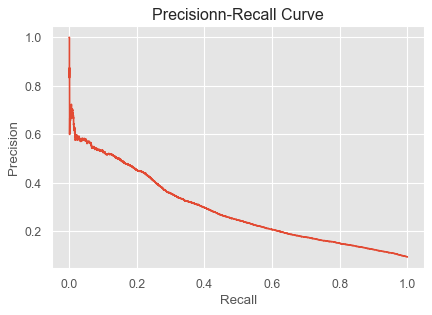

In [45]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:], label="precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precisionn-Recall Curve");

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])

ROC AUC score =  0.7490832392648059


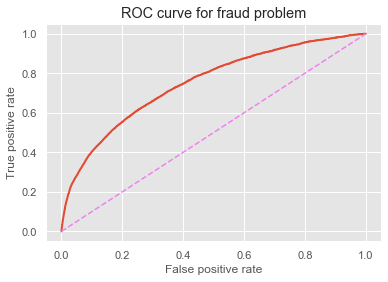

In [47]:
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1],c="violet",ls="--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for fraud problem");
print("ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

In [48]:
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logit.predict_proba(X_test))))

Log-loss on logit: 0.2778


In [49]:
dc = DummyClassifier()
dc.fit(X_train, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, dc.predict_proba(X_test))))

Log-loss on dummy classifier: 6.0322


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [50]:
print("Logistic accuracy:{:6.4f}".format(logit.score(X_test, y_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, y_test)))

Logistic accuracy:0.9065
Dummy accuracy: 0.8261


In [51]:
naiveb = GaussianNB()
naiveb.fit(X_train, y_train)
naiveb.score(X_test, y_test)

0.8817636454977984

In [52]:
naiveb.theta_  # mean of each feature by class

array([[   2.12005978,  485.86526615,    9.00117008,   25.31323164,
          12.76180191,  116.97156211,   13.01985654,    9.45512186,
           0.13492077,   71.07632124,   10.28711383],
       [   4.94118555, 1071.09907825,    8.18556389,   18.53044853,
          13.79737132,   90.70592773,   14.61103459,    8.30403447,
           0.33514356,   71.22299356,    9.59342821]])

In [53]:
np.sqrt(naiveb.sigma_) # variance of each feature by class

array([[   2.78335649, 1186.87702868,    2.76929147,   21.77091976,
           6.16665938,   78.12471356,    6.35635428,    7.14354881,
           0.14392837,   38.07126858,    6.19233057],
       [   6.38107152, 2156.02298531,    2.37856851,   18.04110159,
           6.88053633,   65.84686454,    6.69018783,    6.1565552 ,
           0.2573366 ,   38.20453503,    6.27462805]])

In [54]:
kfold = model_selection.KFold(n_splits=10, random_state=7)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [55]:
nbayes = BernoulliNB()
results_nbayes=model_selection.cross_val_score(nbayes, X_train, y_train, cv = kfold)
acc_bernoulli = results_nbayes.mean()
print(acc_bernoulli)

0.9010828567098791


In [56]:
df_X.describe()

,product_id,user_id,user_product_total_orders,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_since_prior_order,user_product_avg_add_to_cart_order,user_product_order_freq,aisle_id,department_id
count,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000,329806.000000
mean,25478.038332,102584.627005,2.407245,0.098055,544.889863,8.922973,24.931824,12.889714,116.188844,13.134957,9.337801,0.153016,71.065014,10.222197
std,14236.306598,59451.330080,3.442570,0.297389,1328.212503,2.746800,21.717598,6.460288,82.273021,6.429939,7.112959,0.163067,38.075157,6.204519
min,1.000000,50.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.948276,1.000000,0.010101,1.000000,1.000000
25%,13249.000000,50828.000000,1.000000,0.000000,27.000000,7.470236,9.000000,8.433333,56.000000,8.111111,4.000000,0.045455,32.000000,4.000000
50%,25555.500000,103434.000000,1.000000,0.000000,106.000000,8.847826,18.000000,11.826667,96.000000,11.978142,7.666667,0.093750,81.000000,11.000000
75%,38100.000000,154426.000000,2.000000,0.000000,395.000000,10.011561,34.000000,16.000000,154.000000,17.466102,12.333333,0.200000,106.000000,16.000000
max,49683.000000,206175.000000,86.000000,1.000000,10951.000000,75.000000,99.000000,51.357143,689.000000,30.000000,91.000000,1.000000,134.000000,21.000000


In [57]:
gb = GradientBoostingClassifier(n_estimators=100,random_state=7)
results=model_selection.cross_val_score(gb, X_train, y_train, cv = kfold)
acc_gradiant = results.mean()

In [59]:
print(round(acc_gradiant,2,),"%")

0.91 %


In [ ]:
#print("Accuracy:", metrics.accuracy_score(y_test, results_nbayes))
#print("Precission:", metrics.precision_score(y_test, results_nbayes))
#print("Recall:", metrics.recall_score(y_test, results_nbayes))

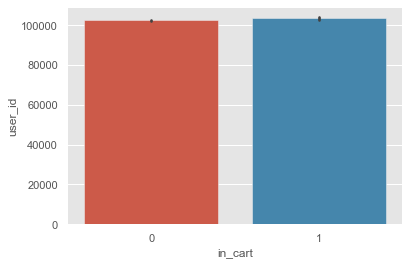

In [60]:
sns.barplot(x="in_cart", y="user_id", data=df_X)

In [61]:
logreg = LogisticRegression()
results_logreg = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold)
acc_log = results_logreg.mean()
print(round(acc_log,2,),"%")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

0.9 %


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
results_knn = model_selection.cross_val_score(knn, X_train, y_train)
acc_knn = results_knn.mean()
print(round(acc_knn,2,),"%")

0.8 %


In [63]:
gaussian = GaussianNB()
results_gaussian = model_selection.cross_val_score(gaussian, X_train, y_train, cv=kfold)
acc_gaussian = results_gaussian.mean()

In [64]:
linear_svc = LinearSVC()
results_svc = model_selection.cross_val_score(linear_svc, X_train, y_train, cv=kfold)
acc_linear_svc = results_svc.mean()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [65]:
ada = AdaBoostClassifier(n_estimators=100, random_state=10)
results_ada = model_selection.cross_val_score(ada, X_train, y_train, cv=kfold)
acc_ada= results_ada.mean()

In [66]:
decision_tree = DecisionTreeClassifier() 
results_decision = model_selection.cross_val_score(decision_tree, X_train, y_train, cv=kfold)
acc_decision_tree = results_decision.mean()

In [67]:
results = pd.DataFrame({
    "Model": ["Support Vector Machines","BernoulliNB", "Gradient Boosting Classifier", "Logistic Regression",
              "KNN", "GaussianNB","Ada Boosting Classifier","Decision Tree"],
    "Score": [acc_linear_svc,acc_bernoulli, acc_gradiant, acc_log, acc_knn, acc_gaussian,acc_ada,acc_decision_tree]
})

In [69]:
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(7)

,Model
Score,
0.905611,Gradient Boosting Classifier
0.905130,Ada Boosting Classifier
0.902418,Logistic Regression
0.901190,Support Vector Machines
0.901083,BernoulliNB
0.874001,GaussianNB
0.839476,Decision Tree


In [70]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
gB = GradientBoostingClassifier(n_estimators=100, random_state=7)
scores = model_selection.cross_val_score(gB, X_train, y_train, cv=kfold, scoring ="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Scores: [0.84332202 0.88169992 0.8939076  0.91637737 0.90294892 0.91855186
 0.91786518 0.92717354 0.92278346 0.93148176]
Mean: 0.9056111634121315
Standard Deviation: 0.025413366538935115


In [71]:
gB = GradientBoostingClassifier(n_estimators=100, random_state=7)
scores = model_selection.cross_val_score(gB, X_train, y_train, cv=kfold, scoring ="recall")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.2084558  0.12208035 0.13438868 0.07881773 0.11390977 0.10502693
 0.11453744 0.09884014 0.09095284 0.09124867]
Mean: 0.1158258360856667
Standard Deviation: 0.03459302331421297


In [76]:
gB = GradientBoostingClassifier(n_estimators=100, random_state=7)
gB.fit(X_train,y_train)
scores = model_selection.cross_val_score(gB, X_train, y_train, cv=kfold, scoring ="precision")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.60340314 0.58160237 0.65409836 0.5659164  0.61836735 0.624
 0.64516129 0.6163522  0.58333333 0.64772727]
Mean: 0.6139961719197885
Standard Deviation: 0.028732240843360228


In [77]:
importances = pd.DataFrame({"feature": X_train.columns,"importance":np.round(gB.feature_importances_,3)})
importances = importances.sort_values("importance", ascending=False).set_index("feature")
importances.head(15)


,importance
feature,
user_product_order_freq,0.854
user_product_total_orders,0.061
product_total_orders,0.032
product_avg_add_to_cart_order,0.015
user_avg_cartsize,0.012
user_total_products,0.009
user_total_orders,0.006
user_avg_since_prior_order,0.006
user_product_avg_add_to_cart_order,0.004


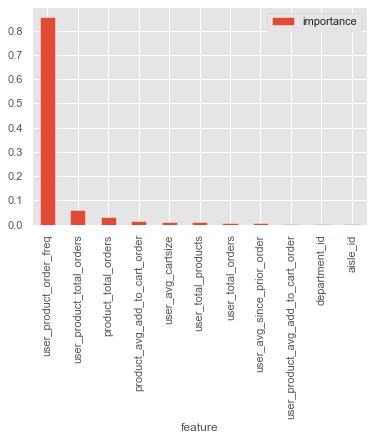

In [78]:
importances.plot.bar()

In [79]:
df_X = df_X.drop("user_product_total_orders",axis=1)
df_X = df_X.drop("user_total_orders",axis=1)
df_X = df_X.drop("department_id",axis=1)
df_X = df_X.drop("aisle_id",axis=1)
df_X = df_X.drop("user_total_products",axis=1)
df_X = df_X.drop("user_avg_cartsize",axis=1)

In [80]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
gb = GradientBoostingClassifier(n_estimators=100,random_state=7)
results=model_selection.cross_val_score(gb, X_train, y_train, cv = kfold)
acc_gradiant = results.mean()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [82]:
print(acc_gradiant)

0.9056111634121315


In [87]:
predictions = cross_val_predict(gb, X_train, y_train, cv=kfold)
confusion_matrix(y_train, predictions)

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.2496249506514015
Recall: 0.2438582282386517


In [88]:
df_X = df_X.drop("product_avg_add_to_cart_order",axis=1)

In [89]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
gb = GradientBoostingClassifier(n_estimators=100,random_state=7)
results=model_selection.cross_val_score(gb, X_train, y_train, cv = kfold)
acc_gradiant = results.mean()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [95]:
predictions = cross_val_predict(gb, X_train, y_train, cv=kfold)
confusion_matrix(y_train, predictions)
gB.fit(X_train,y_train)
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6120445535208608
Recall: 0.12503374599868872
